In [193]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

In [194]:
print(f"Количество строк и столбцов в датасете: {data.shape}")
print("Типы данных в датасете:")
print(data.dtypes)
print("Первые 5 строк датасета:")
print(data.head())


Количество строк и столбцов в датасете: (10000, 14)
Типы данных в датасете:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
Первые 5 строк датасета:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember

Количество строк и столбцов: 10,000 строк и 14 столбцов.

Типы данных: Датасет содержит числовые, объектные переменные.

In [195]:
print('Проверка на пропущенные значения:')
print(data.isnull().sum())
print('Распределение целевой переменной ("Exited"):')
print(data['Exited'].value_counts())

Проверка на пропущенные значения:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Распределение целевой переменной ("Exited"):
Exited
0    7963
1    2037
Name: count, dtype: int64


Пропущенных значений в датасете нет. Все признакиполностью заполнены.

Целевая переменная Exited распределена неравномерно (приблизительно 80% к 20%).

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

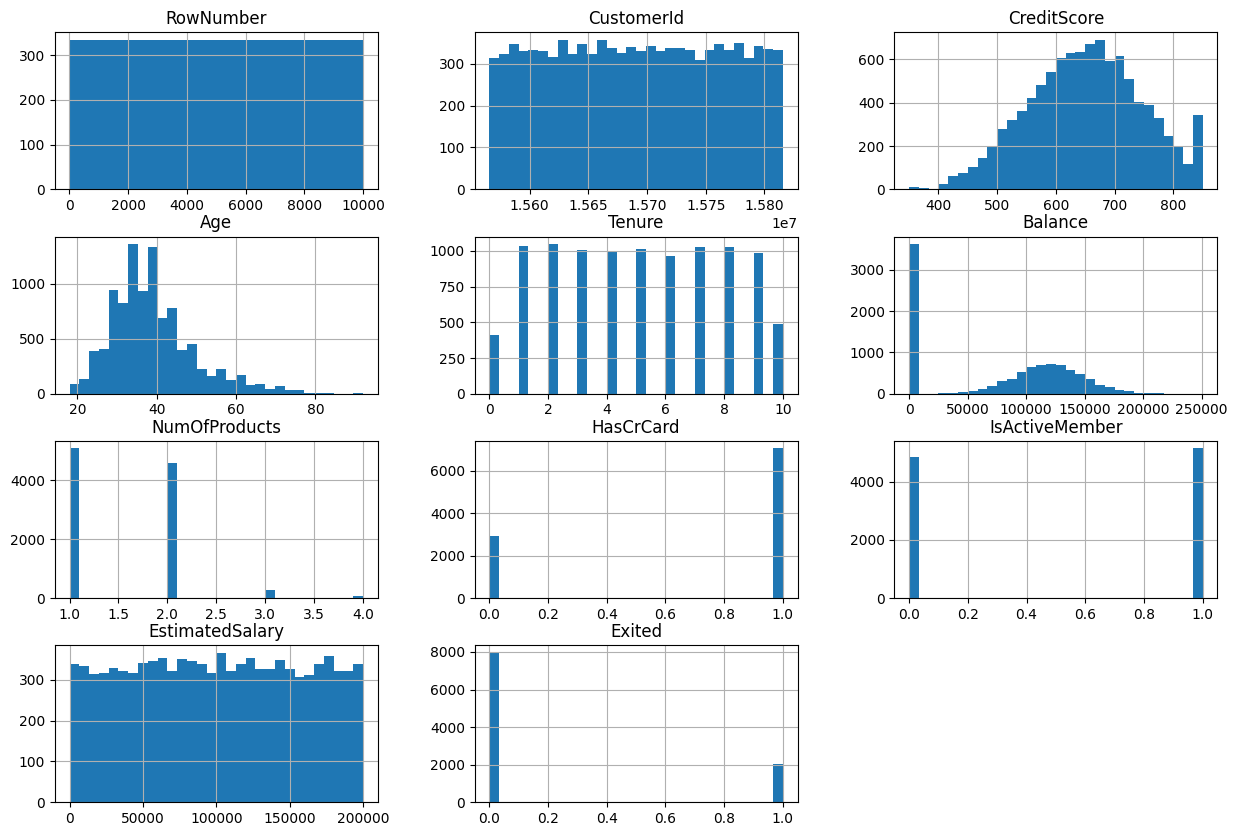

In [197]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

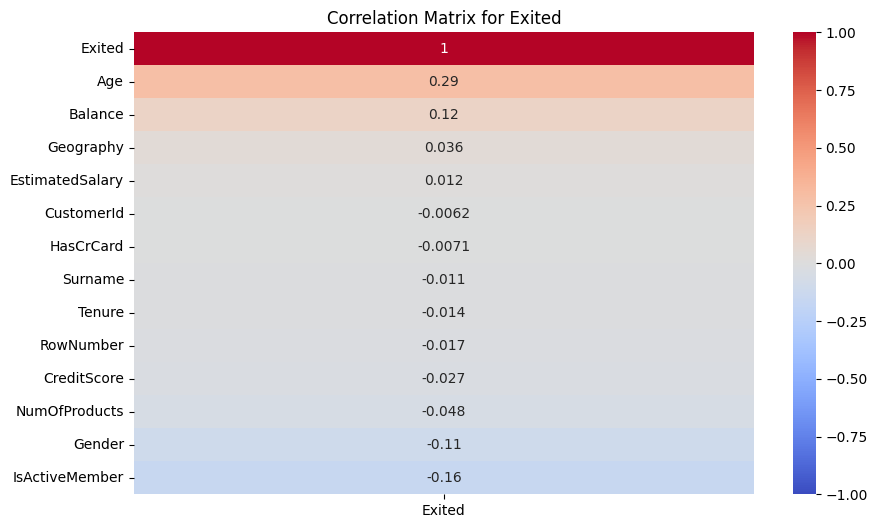

In [200]:
numeric_data = data.copy()

for column in ['Surname', 'Geography', 'Gender']:
    numeric_data[column] = numeric_data[column].astype('category').cat.codes

correlation_matrix = numeric_data.corr()
correlation_exited = correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_exited, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Exited')
plt.show()

CreditScore

<AxesSubplot: >

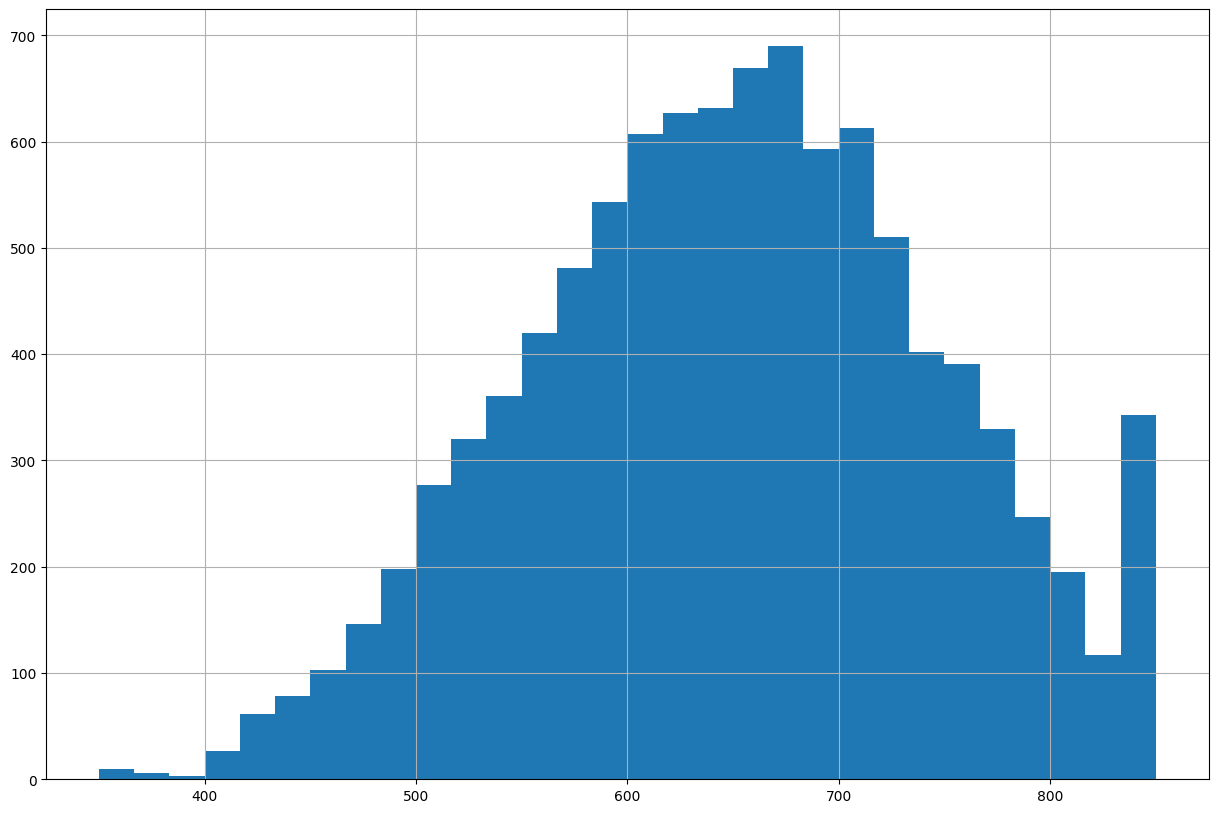

In [201]:
data[(data['CreditScore'] >= 300) & (data['CreditScore'] <= 850)]['CreditScore'].hist(bins=30, figsize=(15, 10))

Отраслевые оценки FICO варьируются от 250 до 900, в то время как оценки общего назначения варьируются от 300 до 850. (Wikipedia)

In [202]:
print(f"Диапазон значений CreditScore: от {data['CreditScore'].min()} до {data['CreditScore'].max()}")
print(f"Количество клиентов с CreditScore в диапазоне [0, 300]: {data[data['CreditScore'] <= 300].shape[0]}")
print(f"Количество клиентов с CreditScore в диапазоне [300, 400): {data[(data['CreditScore'] >= 300) & (data['CreditScore'] < 400)].shape[0]}")
print(f"Количество клиентов с CreditScore в диапазоне (849, oo): {data[data['CreditScore'] > 849].shape[0]}")

Диапазон значений CreditScore: от 350 до 850
Количество клиентов с CreditScore в диапазоне [0, 300]: 0
Количество клиентов с CreditScore в диапазоне [300, 400): 19
Количество клиентов с CreditScore в диапазоне (849, oo): 233


In [203]:
print(data[data['CreditScore'] > 840]['CreditScore'].value_counts().sort_index(ascending=False))

CreditScore
850    233
849      8
848      5
847      6
846      5
845      6
844      7
843      2
842      7
841     12
Name: count, dtype: int64


Удалим записи с CreditScore равными 850, чтобы избавиться от выбросов в данных.

In [204]:
data = data[data['CreditScore'] != 850].copy()

Age

<AxesSubplot: >

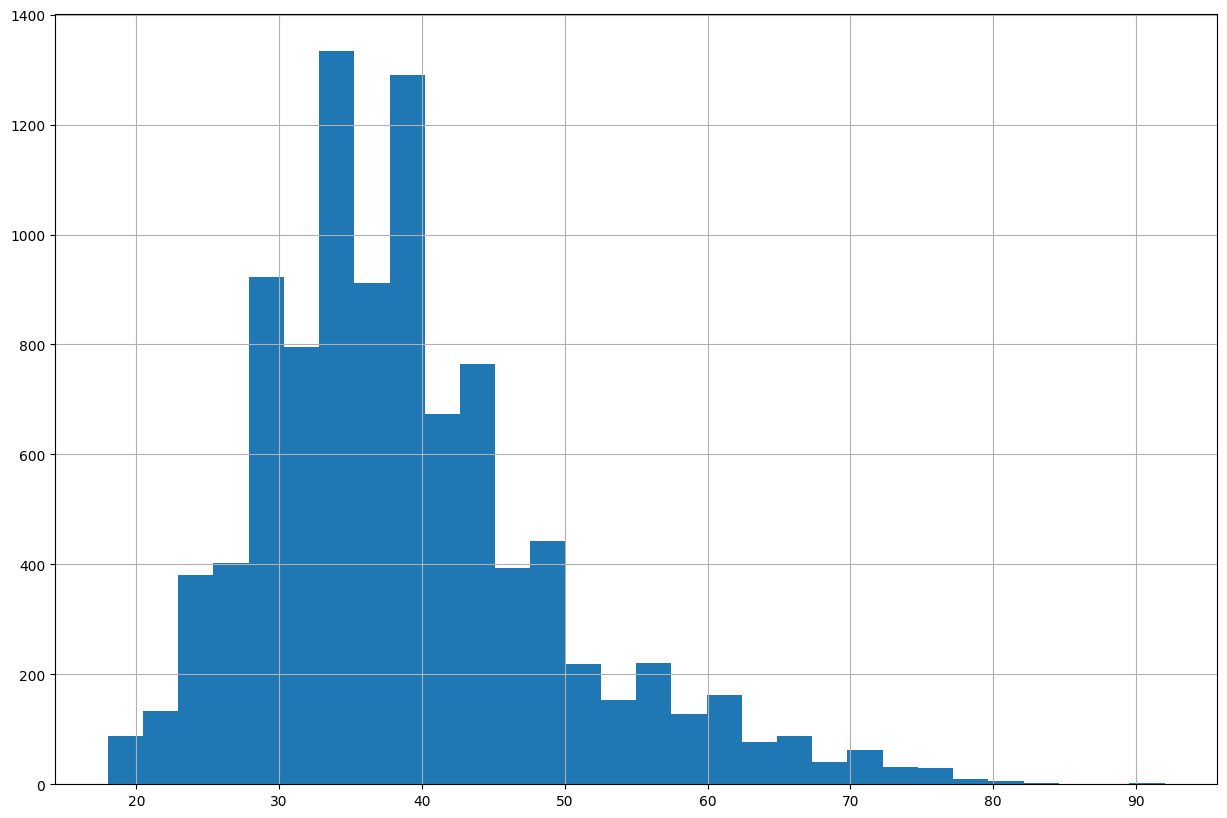

In [205]:
data['Age'].hist(bins=30, figsize=(15, 10))

In [206]:
print(f"Диапазон значений Age: от {data['Age'].min()} до {data['Age'].max()}")
print(f"Количество клиентов с возрастом в диапазоне [18, 75]: {data[data['Age'] <= 75].shape[0]}")
print(f"Количество клиентов с возрастом в диапазоне (75, 92]: {data[data['Age'] > 75].shape[0]}")

Диапазон значений Age: от 18 до 92
Количество клиентов с возрастом в диапазоне [18, 75]: 9724
Количество клиентов с возрастом в диапазоне (75, 92]: 43


Tenure

<AxesSubplot: >

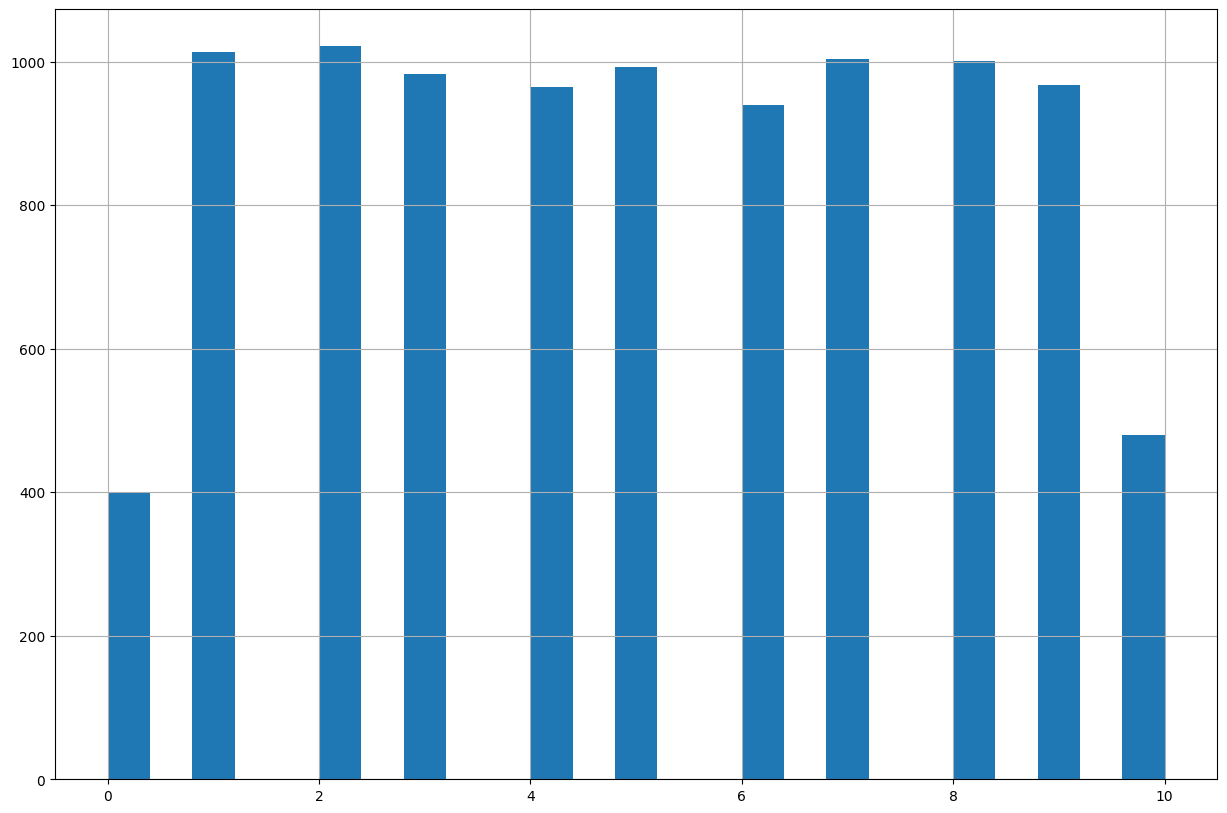

In [207]:
data['Tenure'].hist(bins=25, figsize=(15, 10))

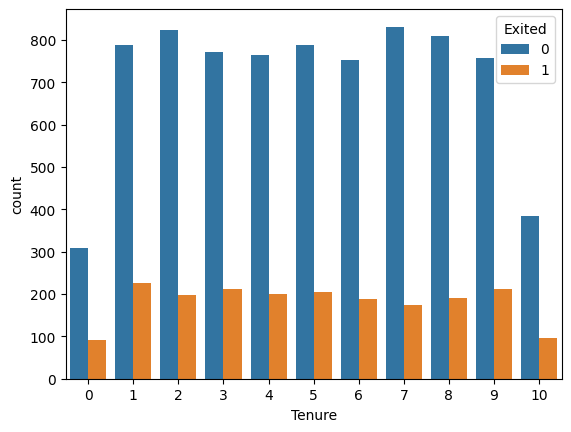

In [208]:
sns.countplot(x='Tenure', hue='Exited', data=data)
plt.show()

Удалим записи с Tenure равным 0 и 10 для получения более равномерного распределения от 1 до 9 Tenure всех записей и уменьшения сложности архитектур будущих моделей.

In [209]:
data = data[(data['Tenure'] != 0) & (data['Tenure'] != 10)].copy()

Balance

<AxesSubplot: >

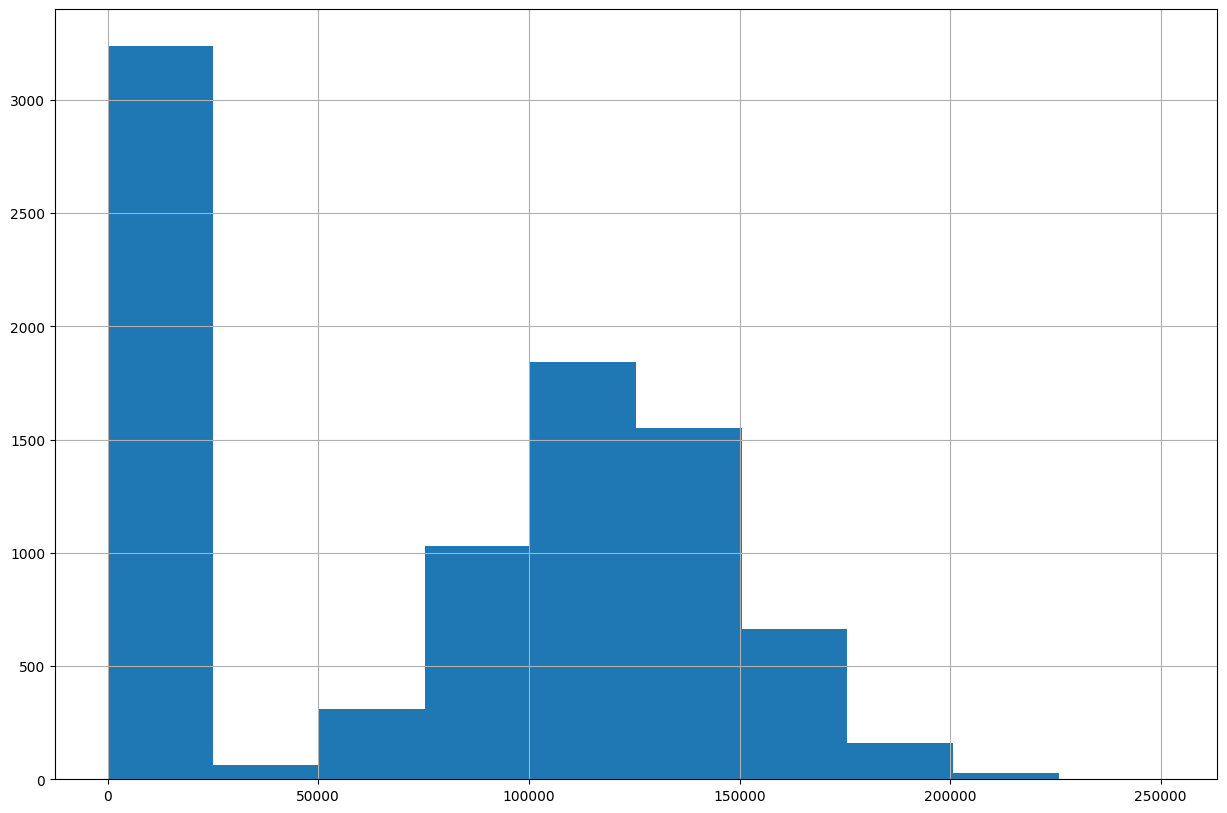

In [210]:
data['Balance'].hist(figsize=(15, 10))

In [211]:
print('Распределение клиентов с балансом > 21000:')
print(data[data['Balance'] > 210000]['Balance'].value_counts().sort_index(ascending=False))
print('Распределение клиентов с балансом в интервале (0, 25000):')
print(data[(data['Balance'] > 0) & (data['Balance'] < 25000)]['Balance'].value_counts().sort_index(ascending=False))
print('Balance = 0', data[data['Balance'] == 0]['Exited'].value_counts().sort_index(ascending=False))
print('Balance от 23000 до 230000', data[(data['Balance'] >= 23000) & (data['Balance'] <= 230000)]['Exited'].value_counts().sort_index(ascending=False))

Распределение клиентов с балансом > 21000:
Balance
250898.09    1
238387.56    1
222267.63    1
221532.80    1
216109.88    1
214346.96    1
213146.20    1
212696.32    1
212692.97    1
212314.03    1
210433.08    1
Name: count, dtype: int64
Распределение клиентов с балансом в интервале (0, 25000):
Balance
24043.45    1
23503.31    1
16893.59    1
14262.80    1
12459.19    1
Name: count, dtype: int64
Balance = 0 Exited
1     442
0    2791
Name: count, dtype: int64
Balance от 23000 до 230000 Exited
1    1360
0    4289
Name: count, dtype: int64


NumOfProducts

<AxesSubplot: >

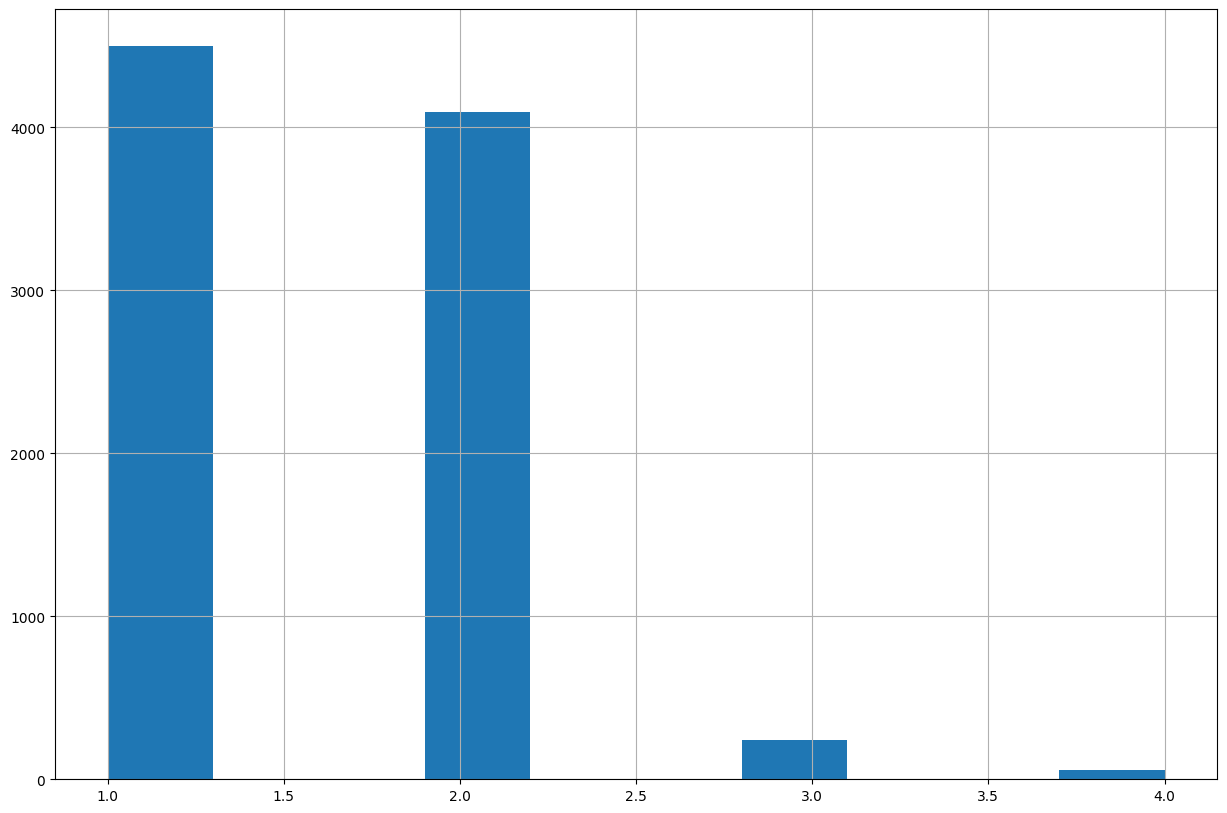

In [212]:
data['NumOfProducts'].hist(figsize=(15, 10))

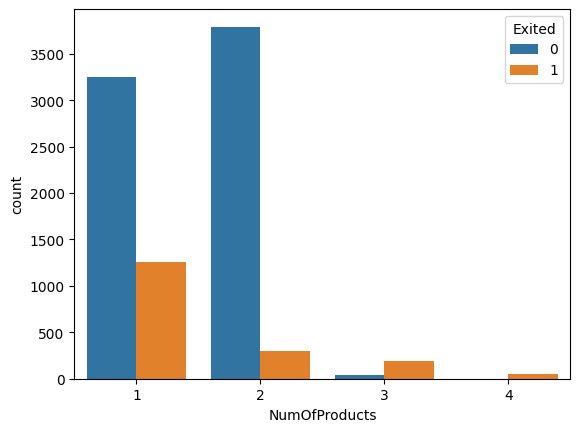

In [213]:
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.show()

In [214]:
print(data['NumOfProducts'].value_counts())

NumOfProducts
1    4499
2    4093
3     241
4      54
Name: count, dtype: int64


Чтобы упростить анализ и улучшить модели, создадим бинарный признак ProdRiskCat , где 1 означает, что клиент имеет 1-2 продукта (низкий риск ухода), а 0 — что клиент имеет 3-4 продукта (высокий риск ухода) и удалим NumOfProducts.

In [215]:
import numpy as np

In [216]:
data['ProdRiskCat'] = np.where(data['NumOfProducts'] <= 2, 1, 0)

In [217]:
del data['NumOfProducts']

HasCrCard

<AxesSubplot: >

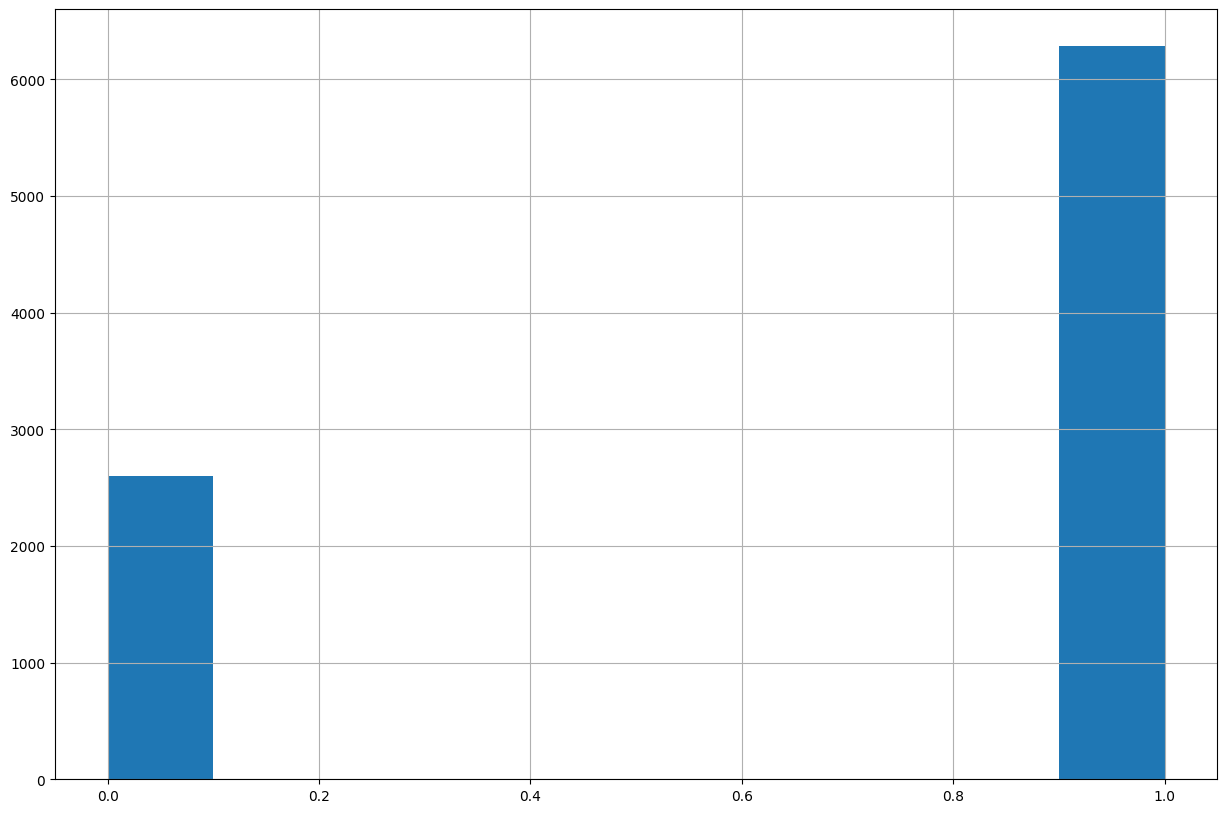

In [218]:
data['HasCrCard'].hist(figsize=(15, 10))

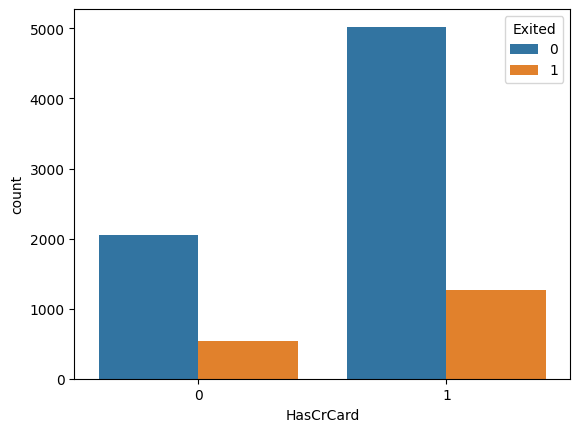

In [219]:
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.show()

In [220]:
print(data['HasCrCard'].value_counts())
print('HasCrCard = 0', data[data['HasCrCard'] == 0]['Exited'].value_counts())
print('HasCrCard = 1', data[data['HasCrCard'] == 1]['Exited'].value_counts())

HasCrCard
1    6287
0    2600
Name: count, dtype: int64
HasCrCard = 0 Exited
0    2058
1     542
Name: count, dtype: int64
HasCrCard = 1 Exited
0    5024
1    1263
Name: count, dtype: int64


Примерно 20,8% (542 из 2600) клиентов без кредитной карты покинули банк. В то же время, среди клиентов с кредитной картой (HasCrCard = 1) процент ушедших составляет примерно 20,1% (1263 из 6287).
Клиенты с кредитной картой и без ведут себя одинакого.

IsActiveMember

<AxesSubplot: >

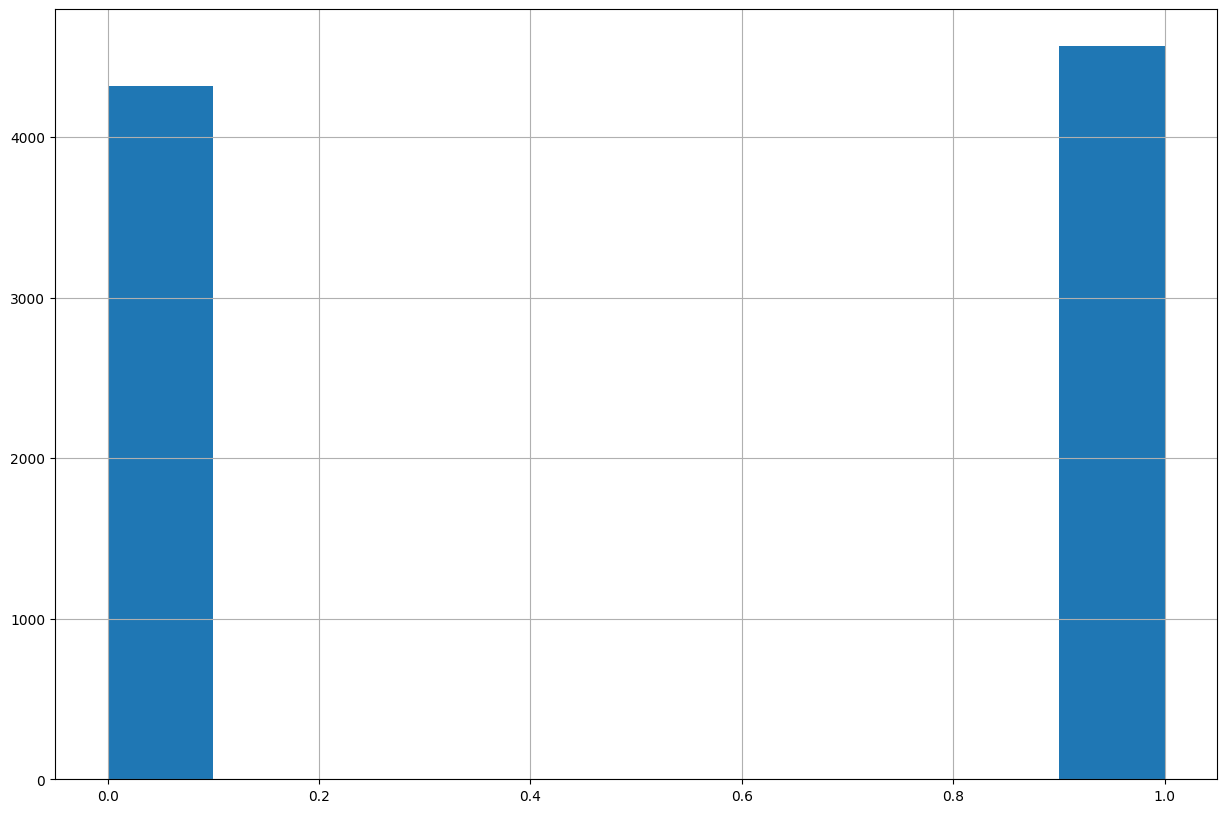

In [221]:
data['IsActiveMember'].hist(figsize=(15, 10))

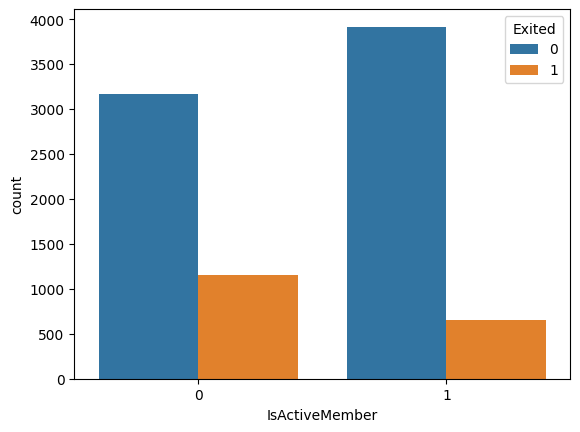

In [222]:
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.show()

Клиенты с активным статус имеют меньший шанс уйти из банка, чем не активные клиенты.

EstimatedSalary

<AxesSubplot: >

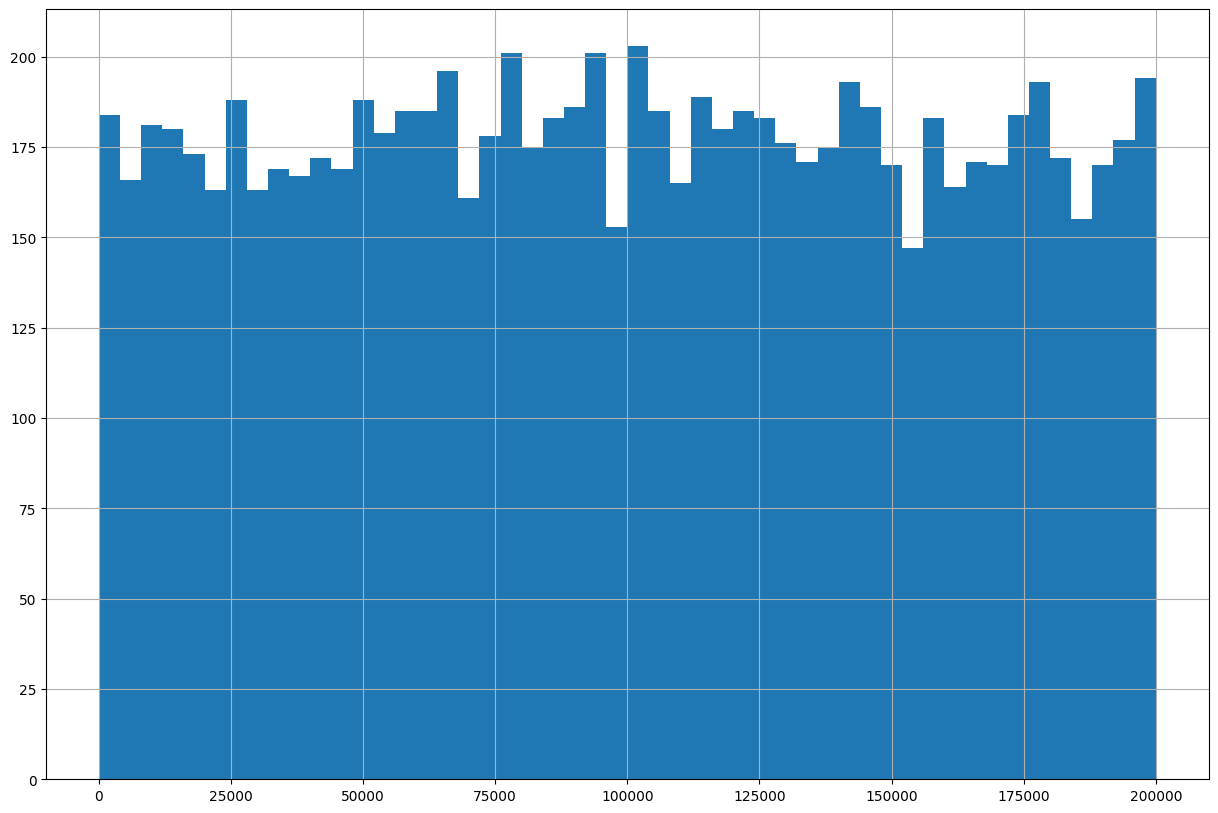

In [223]:
data['EstimatedSalary'].hist(bins = 50, figsize=(15, 10))

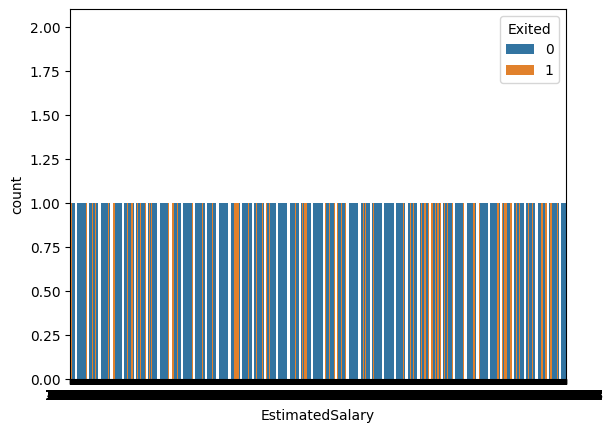

In [224]:
sns.countplot(x='EstimatedSalary', hue='Exited', data=data)
plt.show()

In [225]:
print(f"Диапазон значений EstimatedSalary: от {data['EstimatedSalary'].min()} до {data['EstimatedSalary'].max()}")
print('EstimatedSalary < 50000', data[data['EstimatedSalary'] < 50000]['Exited'].value_counts().sort_index(ascending=False))
print('EstimatedSalary от 50000 до 100000', data[(data['EstimatedSalary'] >= 50000) & (data['EstimatedSalary'] < 100000)]['Exited'].value_counts().sort_index(ascending=False))
print('EstimatedSalary от 100000 до 150000', data[(data['EstimatedSalary'] >= 100000) & (data['EstimatedSalary'] < 150000)]['Exited'].value_counts().sort_index(ascending=False))
print('EstimatedSalary от 150000 до 200000', data[(data['EstimatedSalary'] >= 150000) & (data['EstimatedSalary'] < 200000)]['Exited'].value_counts().sort_index(ascending=False))

Диапазон значений EstimatedSalary: от 11.58 до 199992.48
EstimatedSalary < 50000 Exited
1     419
0    1758
Name: count, dtype: int64
EstimatedSalary от 50000 до 100000 Exited
1     449
0    1820
Name: count, dtype: int64
EstimatedSalary от 100000 до 150000 Exited
1     465
0    1818
Name: count, dtype: int64
EstimatedSalary от 150000 до 200000 Exited
1     472
0    1686
Name: count, dtype: int64


Равномерно распределеные значения EstimatedSalary не характеризуют особенности поведения людей и не несут аналитической ценности.

Gender

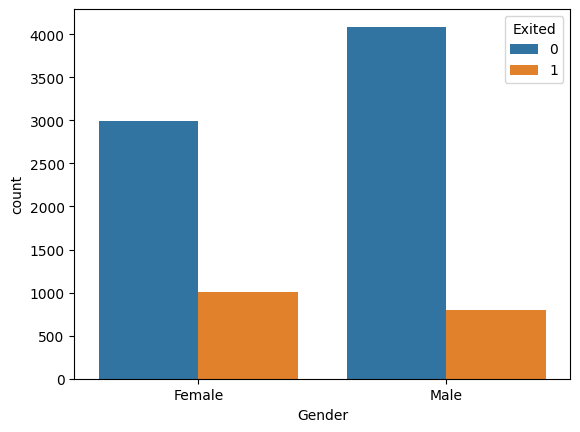

In [226]:
sns.countplot(x='Gender', hue='Exited', data=data)
plt.show()

In [227]:
print(data['Gender'].value_counts())
print('Female', data[data['Gender'] == 'Female']['Exited'].value_counts())
print('Male', data[data['Gender'] == 'Male']['Exited'].value_counts())

Gender
Male      4888
Female    3999
Name: count, dtype: int64
Female Exited
0    2995
1    1004
Name: count, dtype: int64
Male Exited
0    4087
1     801
Name: count, dtype: int64


Мужчины с меньшим шансом уходят из банка, чем женщины.

In [228]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})

C:\Users\micro\AppData\Local\Temp\ipykernel_9180\355549184.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})


Geography

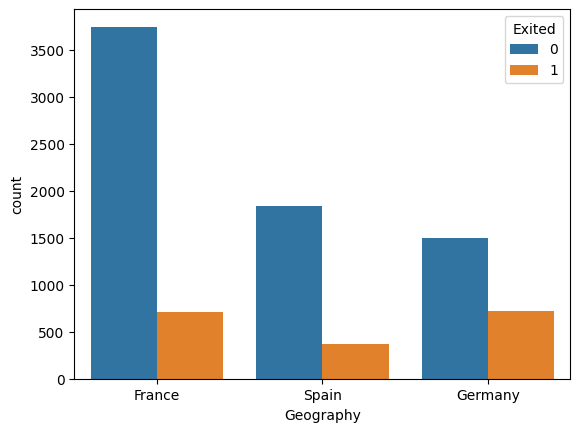

In [229]:
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()

In [230]:
print(data['Geography'].value_counts())
print('France', data[data['Geography'] == 'France']['Exited'].value_counts())
print('Spain', data[data['Geography'] == 'Spain']['Exited'].value_counts())
print('Germany', data[data['Geography'] == 'Germany']['Exited'].value_counts())

Geography
France     4463
Germany    2217
Spain      2207
Name: count, dtype: int64
France Exited
0    3749
1     714
Name: count, dtype: int64
Spain Exited
0    1838
1     369
Name: count, dtype: int64
Germany Exited
0    1495
1     722
Name: count, dtype: int64


Клиенты из Германии уходят чаще, чем клиенты из других регионов.

In [231]:
data['Geography'] = data['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})

C:\Users\micro\AppData\Local\Temp\ipykernel_9180\1025067735.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Geography'] = data['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})


Выводы:

RowNumber представляет собой порядковый номер строки и не несет аналитической ценности для анализа данных.

CustomeId представляет собой идентификатор клиента и не несет аналитической ценности для анализа данных.

CreditScore. После удаления выбросов гистограмма распределения значений CreditScore приобретает форму, напоминающую нормальное распределение. Большинство клиентов имеют кредитные оценки, сосредоточенные вокруг среднего значения.

Age. Гистограмма распределения значений Age, напоминающая гамма-распределение, с вершиной около 33 лет указывает на то, что большинство клиентов сосредоточены в этом возрасте, с уменьшением числа клиентов по мере удаления от этой возрастной группы.

Tenure. После удаления аномалий получилось равномерное распределение значений Tenure всех записей и признак Tenure перестал нести аналитическую ценность.

Balance представляет собой разнообразное распределение, необходимое при построении точной модели классификатора.

ProdRiskCat представляет собой идентификатор продуктовой группы риска. У клиентов с одним или двумя продуктами меньше шанс покинуть банк, чем у клиентов с большим количеством продуктов.

HasCrCard бинарный признак наличия у клиента кредитнйо карты. Хотя разные классы ведут себя одинакого, решено оставить признак для дальнейшего анализа его важности для построения моделей.

IsActiveMember. Клиенты с активным статус имеют меньший шанс уйти из банка, чем не активные клиенты.

EstimatedSalary. Равномерно распределеные значения EstimatedSalary не характеризуют особенности поведения людей и не несут аналитической ценности.

Gender. Мужчины (Gender = 1) с меньшим шансом уходят из банка, чем женщины (Gender = 0).

Geography. Клиенты из Германии уходят чаще, чем клиенты из других регионов. 'France' = 0, 'Spain' = 1, 'Germany' = 2.

In [233]:
del data['RowNumber']
del data['CustomerId']
del data['Tenure']
del data['EstimatedSalary']
del data['Surname']

In [234]:
print(f"Количество строк и столбцов в обработанном датасете: {data.shape}")
print("Типы данных в обработанном датасете:")
print(data.dtypes)
print("Первые 5 строк обработанного датасета:")
data.head()

Количество строк и столбцов в обработанном датасете: (8887, 9)
Типы данных в обработанном датасете:
CreditScore         int64
Geography           int64
Gender              int64
Age                 int64
Balance           float64
HasCrCard           int64
IsActiveMember      int64
Exited              int64
ProdRiskCat         int32
dtype: object
Первые 5 строк обработанного датасета:


,CreditScore,Geography,Gender,Age,Balance,HasCrCard,IsActiveMember,Exited,ProdRiskCat
0,619,0,0,42,0.00,1,1,1,1
1,608,1,0,41,83807.86,0,1,0,1
2,502,0,0,42,159660.80,1,0,1,0
3,699,0,0,39,0.00,0,0,0,1
5,645,1,1,44,113755.78,1,0,1,1


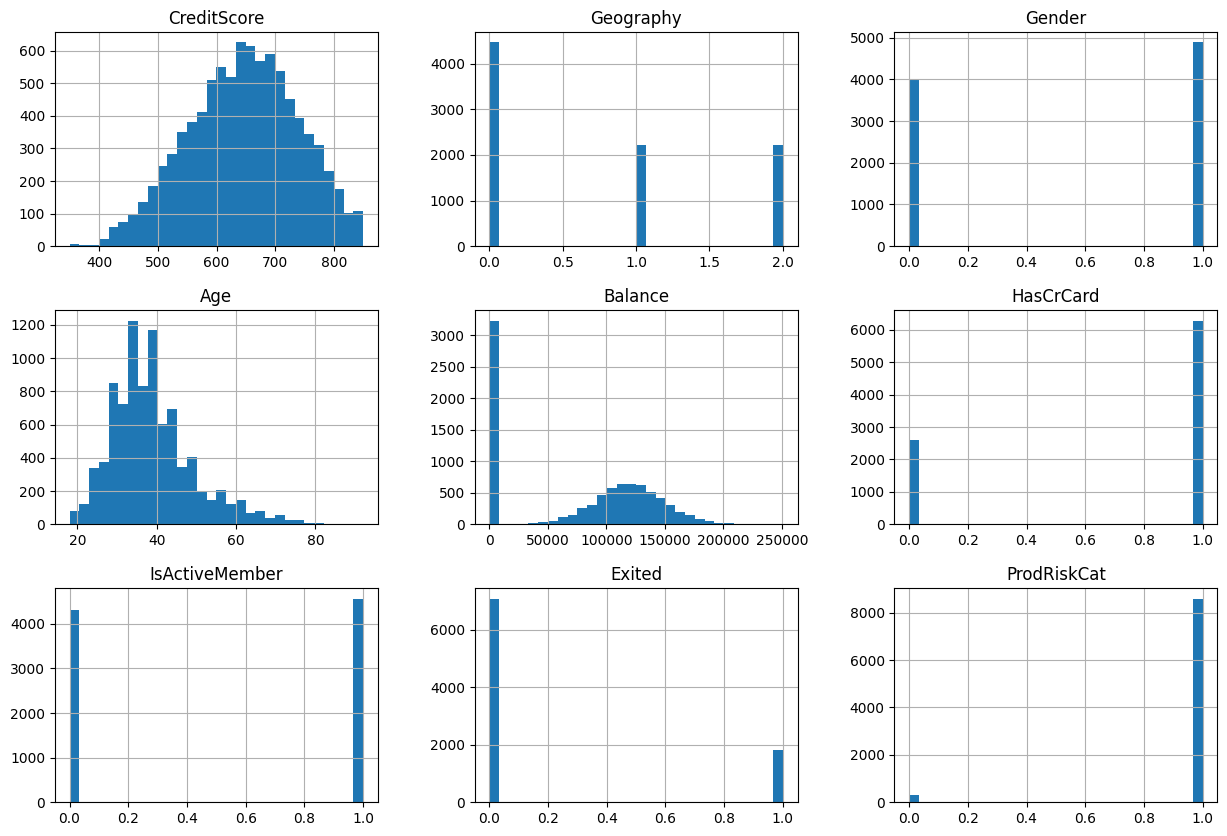

In [235]:
data.hist(bins = 30, figsize=(15, 10))
plt.show()

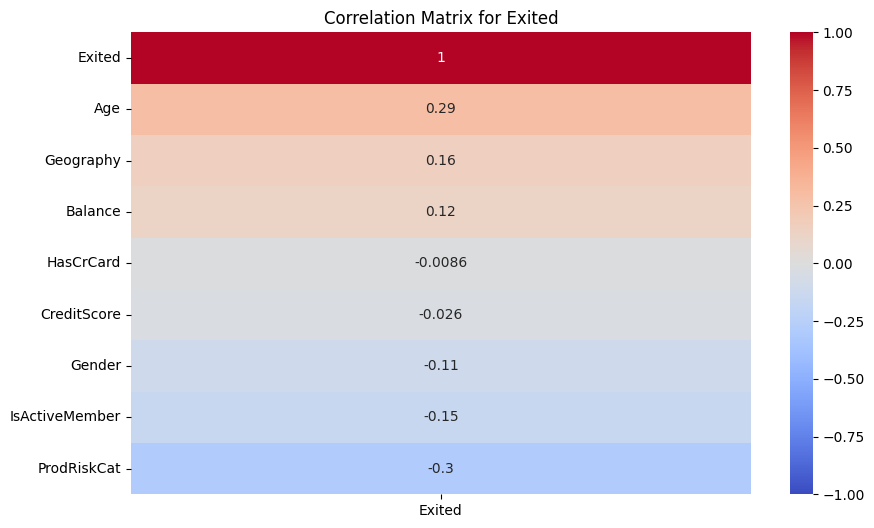

In [236]:
correlation_matrix = data.corr()
correlation_exited = correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_exited, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Exited')
plt.show()

In [237]:
data.to_csv('Churn_Modelling_treated.csv')